## Model Evaluation

This notebook is written for some manual analysis, on the model result. It's highly depend on model results.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
file_dir = '../output_3/'
model_file = os.listdir(file_dir)
model_file = [i for i in model_file if 'model_result' in i]

In [4]:
df_model_list = []

for file_name in model_file:
    file_location = file_dir + file_name
    ticker_name = file_name.split('_')[0]
    df = pd.read_csv(file_location)
    df.columns = ['col', 'tuning_sharpe', 'tuning_rmse', 'tuning_spearmanr', 'cagr',
       'train_sharpe_ratio', 'calmar', 'test_spearmanr', 'test_sharpe',
       'test_rmse', 'model_name']
    model = ['ridge','rf','gb']
    df['ticker_name'] = ticker_name
    df_model_list.append(df)
df_model = pd.concat(df_model_list)
df_model = df_model.replace([np.inf, -np.inf], np.nan,)

In [9]:
df_model[ (df_model['col'] == 'base') & (df_model['model_name'].isin(['ridge','gb'])) & (df_model['ticker_name'] == 'AAPL') ]

,col,tuning_sharpe,tuning_rmse,tuning_spearmanr,cagr,train_sharpe_ratio,calmar,test_spearmanr,test_sharpe,test_rmse,model_name,ticker_name
0,base,0.841951,-0.017681,0.063991,0.333230,1.166930,1.249957,0.065223,0.872798,0.000435,ridge,AAPL
38,base,0.280440,-0.018849,0.093096,21.529395,15.880361,NaN,0.022868,0.903614,0.000543,gb,AAPL


# CAGR basemodel VS other models

In [11]:
indicator_list = list(set(df_model['col']))
print(len(indicator_list))
col = sns.color_palette("husl", len(indicator_list)).as_hex()
col = pd.DataFrame( {'col':indicator_list, 'color':col})
col.loc[(col['col'] == 'base'),'color'] = 'black'

19


In [12]:

def plot_model_vs_baseline(df_model, key = 'test_rmse', color_df = col ,ascending = False):

    df_model_ridge = df_model[df_model['model_name'] == 'ridge']
    df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
    df_model_ridge = df_model_ridge.merge(color_df, on = 'col')
    df_model_ridge = df_model_ridge.sort_values([key], ascending= ascending)

    df_model_rf = df_model[df_model['model_name'] == 'rf']
    df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
    df_model_rf = df_model_rf.merge(color_df, on = 'col')
    df_model_rf = df_model_rf.sort_values([key], ascending= ascending)

    df_model_gbm = df_model[df_model['model_name'] == 'gb']
    df_model_gbm = df_model_gbm.groupby(['col']).mean().reset_index()
    df_model_gbm = df_model_gbm.merge(color_df, on = 'col')
    df_model_gbm = df_model_gbm.sort_values([key], ascending= ascending)

    df_model_all = df_model.groupby(['col']).mean().reset_index()
    df_model_all = df_model_all.merge(color_df, on = 'col')
    df_model_all = df_model_all.sort_values([key], ascending= ascending)

    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(18.5, 10.5)
    if('train' in key): title_key = key.replace('train_','')
    else: title_key = key
    fig.suptitle(f'Model {title_key} with baseline model')

    axs[0,0].barh(df_model_ridge['col'], df_model_ridge[key], color=df_model_ridge['color'])
    axs[0,0].title.set_text('Ridge')
    axs[0,1].barh(df_model_rf['col'], df_model_rf[key], color=df_model_rf['color'])
    axs[0,1].title.set_text('Random Forest')
    axs[1,0].barh(df_model_gbm['col'], df_model_gbm[key], color=df_model_gbm['color'])
    axs[1,0].title.set_text('GBM')

    axs[1,1].barh(df_model_all['col'], df_model_all[key], color=df_model_all['color'])
    axs[1,1].title.set_text('All')

In [13]:
df_model

,col,tuning_sharpe,tuning_rmse,tuning_spearmanr,cagr,train_sharpe_ratio,calmar,test_spearmanr,test_sharpe,test_rmse,model_name,ticker_name
0,base,0.841951,-0.017681,0.063991,0.333230,1.166930,1.249957,0.065223,0.872798,0.000435,ridge,AAPL
1,RSI_20,0.381673,-0.017644,0.086610,0.519612,1.638183,1.639243,0.105298,NaN,0.000429,ridge,AAPL
2,RSI_20_ta,0.718830,-0.017683,0.062858,0.388106,1.311704,1.166602,0.059663,NaN,0.000435,ridge,AAPL
3,RSI_25,0.559923,-0.017665,0.076933,0.464156,1.503910,1.456104,0.088914,NaN,0.000431,ridge,AAPL
4,RSI_25_ta,0.716717,-0.017681,0.064283,0.350273,1.212495,1.109673,0.059623,NaN,0.000435,ridge,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...
52,ENT_2_10,0.910248,-0.014555,-0.013938,8.591585,16.274879,2706.136382,-0.075539,NaN,0.000521,gb,DIS
53,ENT_4_16,-0.091314,-0.014050,-0.012834,8.703783,16.446481,NaN,-0.017435,NaN,0.000556,gb,DIS
54,FTI_LP,0.011437,-0.014063,-0.006207,8.703783,16.446481,NaN,0.010248,NaN,0.006150,gb,DIS
55,FTI_BP,0.311574,-0.014138,0.001731,8.703783,16.446481,NaN,-0.061933,NaN,0.000565,gb,DIS


/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fa

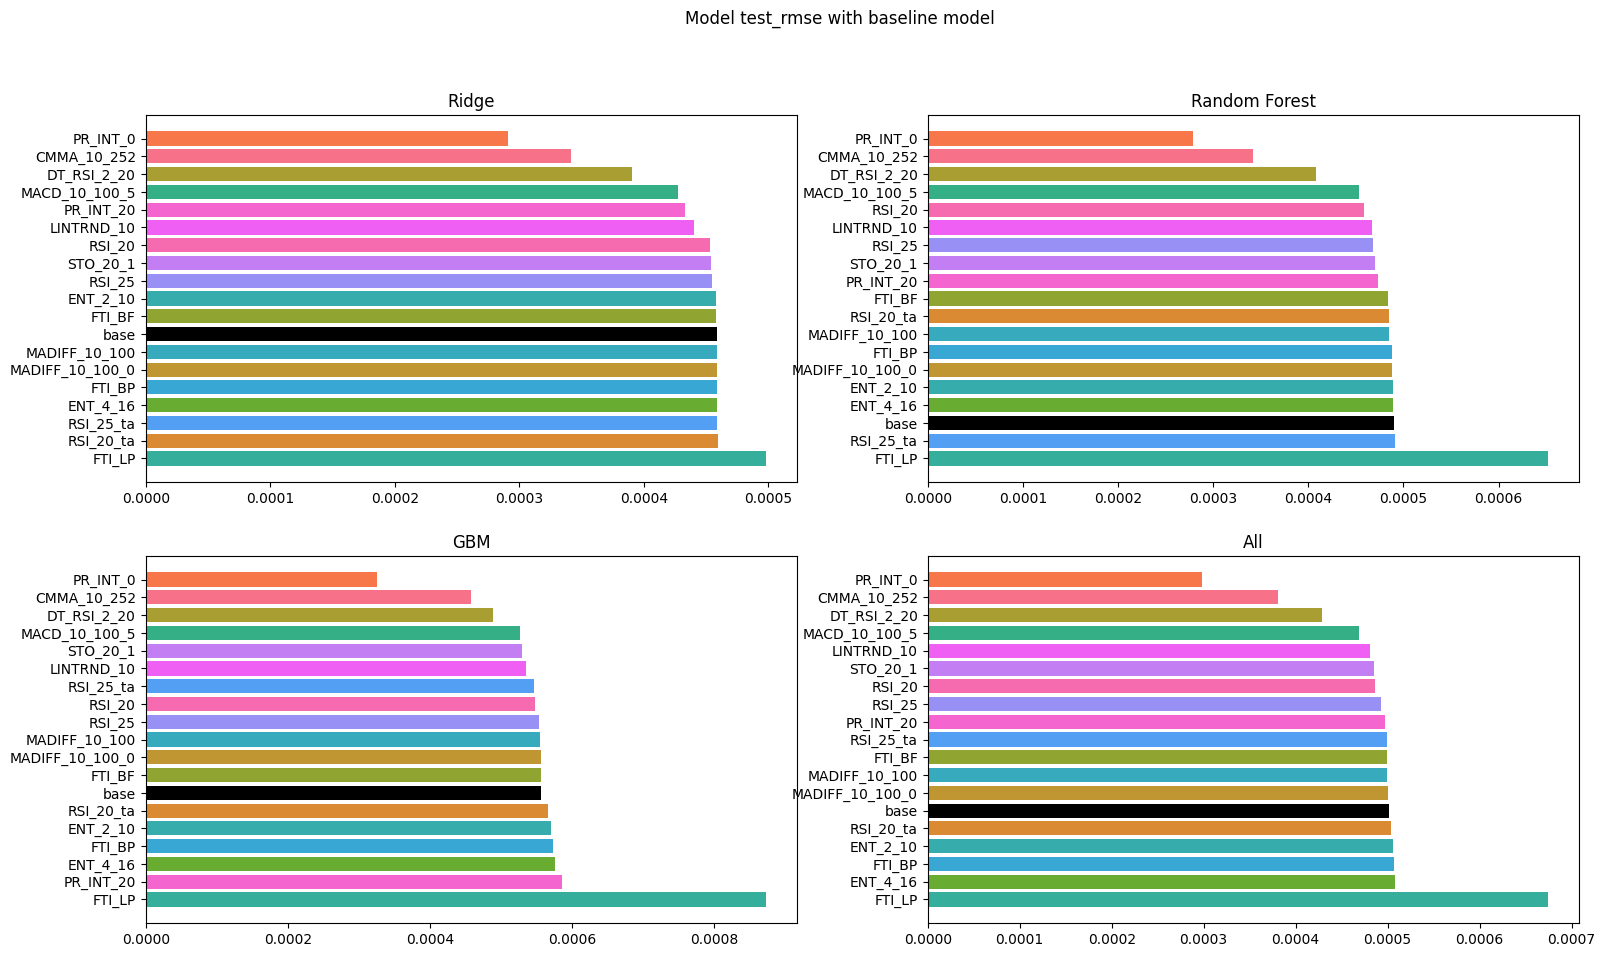

In [16]:
plot_model_vs_baseline(df_model, key = 'test_rmse')
plt.savefig('../imgs/model_baseline_rmse.png')

/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fa

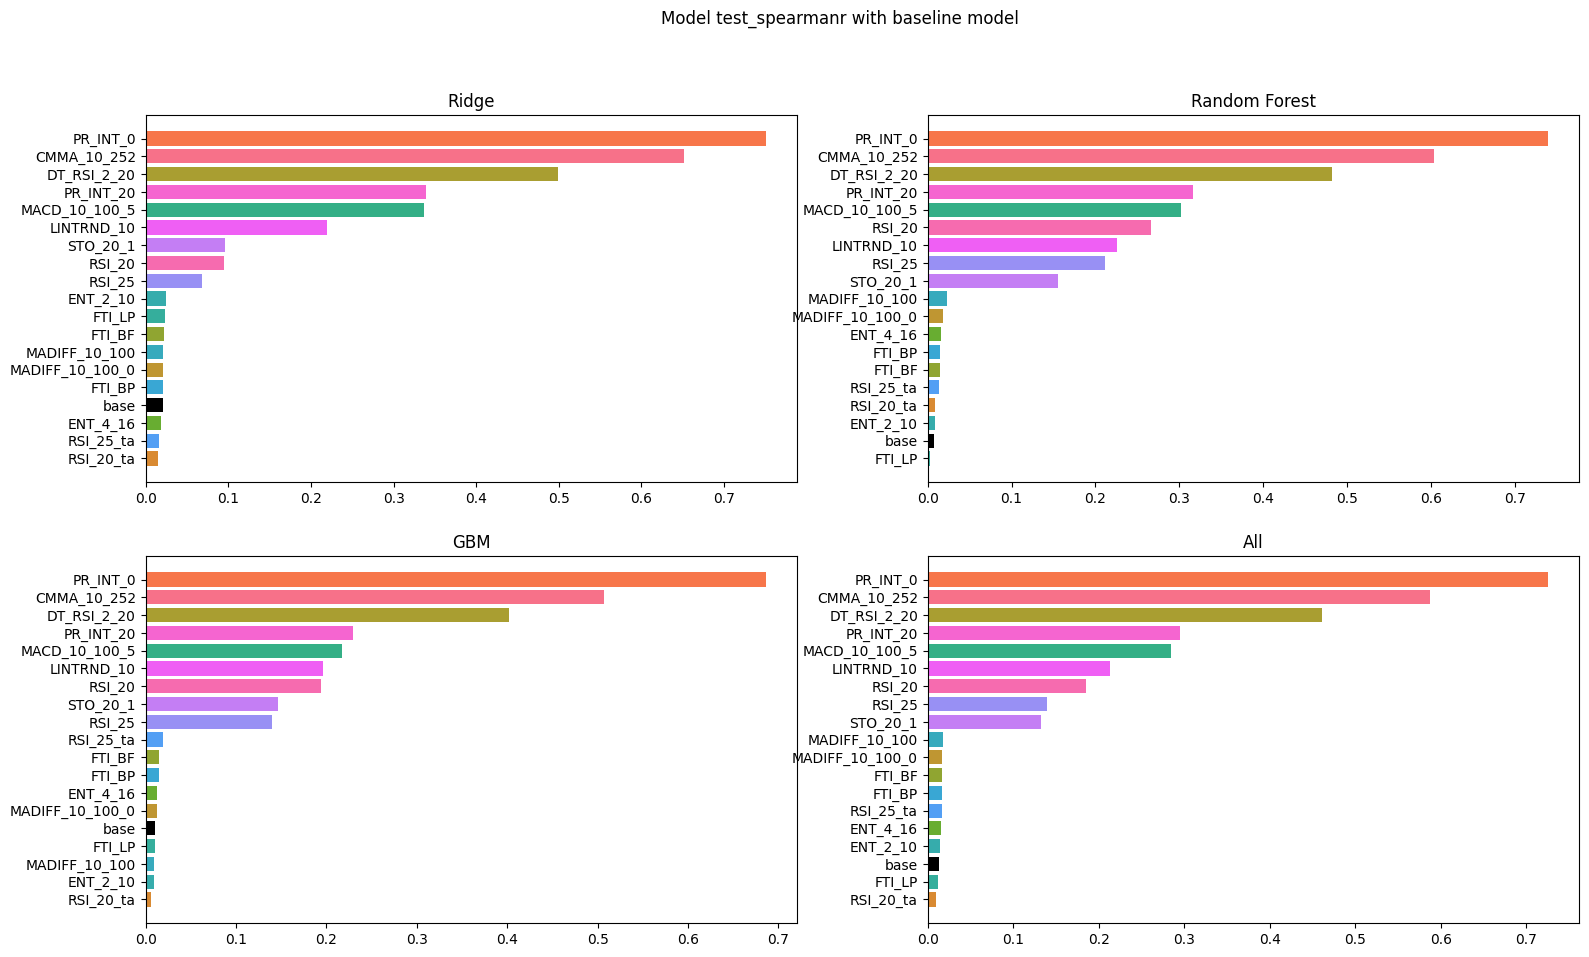

In [22]:
plot_model_vs_baseline(df_model, key = 'test_spearmanr',ascending=True)
plt.savefig('../imgs/model_baseline_spearmanr.png')

/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fa

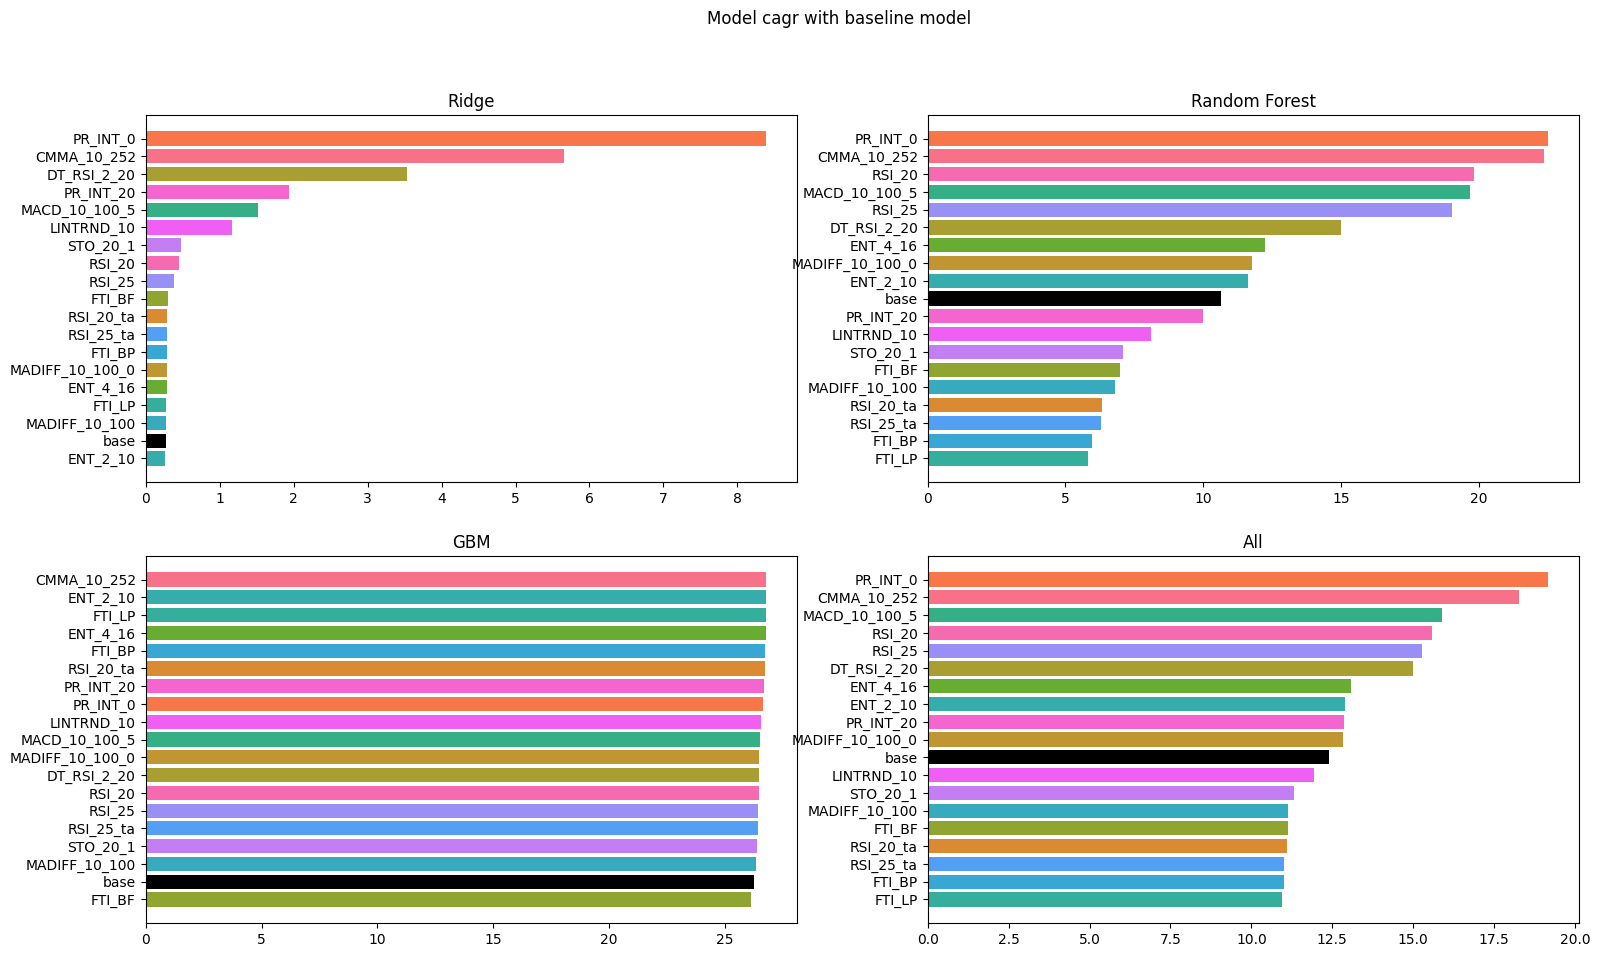

In [17]:
plot_model_vs_baseline(df_model, key = 'cagr',ascending=True)
plt.savefig('../imgs/model_baseline_cagr.png')

In [10]:
df_model.columns

Index(['col', 'tuning_sharpe', 'tuning_rmse', 'tuning_spearmanr', 'cagr',
       'train_sharpe_ratio', 'calmar', 'test_spearmanr', 'test_sharpe',
       'test_rmse', 'model_name', 'ticker_name'],
      dtype='object')

# Timothy VS Talibs

/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fa

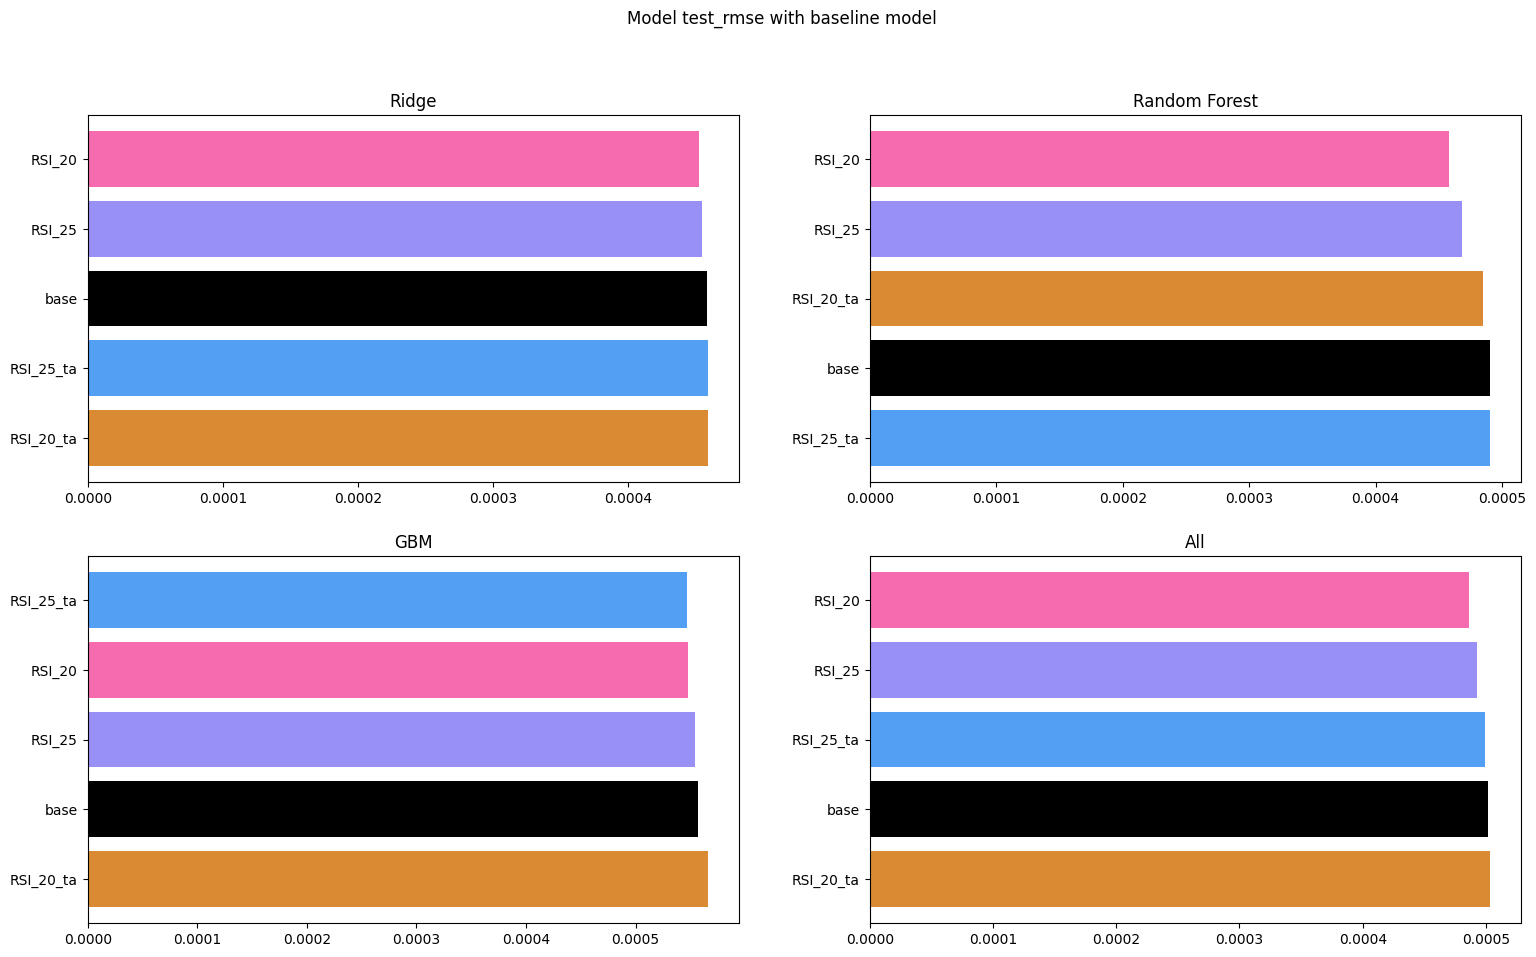

In [18]:
df_rsi = df_model[df_model['col'].isin(['base','RSI_20','RSI_25','RSI_20_ta','RSI_25_ta'])]
plot_model_vs_baseline(df_rsi, key = 'test_rmse')
plt.savefig('../imgs/model_rsi_rmse.png')

In [20]:
df_model[df_model['ticker_name'] == 'OEX'][['col', 'cagr','train_sharpe_ratio', 'test_spearmanr','test_rmse', 'model_name']].head(10)

,col,cagr,train_sharpe_ratio,test_spearmanr,test_rmse,model_name
0,base,0.137482,0.985178,-0.027862,0.000123,ridge
1,RSI_20,0.307382,1.984911,0.039182,0.000121,ridge
2,RSI_20_ta,0.134569,0.966897,-0.041839,0.000123,ridge
3,RSI_25,0.254498,1.686466,0.014134,0.000122,ridge
4,RSI_25_ta,0.140823,1.006081,-0.036890,0.000123,ridge
5,DT_RSI_2_20,1.625598,7.675616,0.485152,0.000099,ridge
6,STO_20_1,0.317972,2.043457,0.038235,0.000122,ridge
7,MADIFF_10_100_0,0.160261,1.126614,-0.023064,0.000122,ridge
8,MADIFF_10_100,0.152731,1.080146,-0.021893,0.000122,ridge
9,MACD_10_100_5,1.011939,5.295889,0.361316,0.000109,ridge


/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_ridge = df_model_ridge.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_model_rf = df_model_rf.groupby(['col']).mean().reset_index()
/var/folders/6p/pnt3xqxx35lccfshb31xlh6h0000gp/T/ipykernel_79682/3275780209.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to Fa

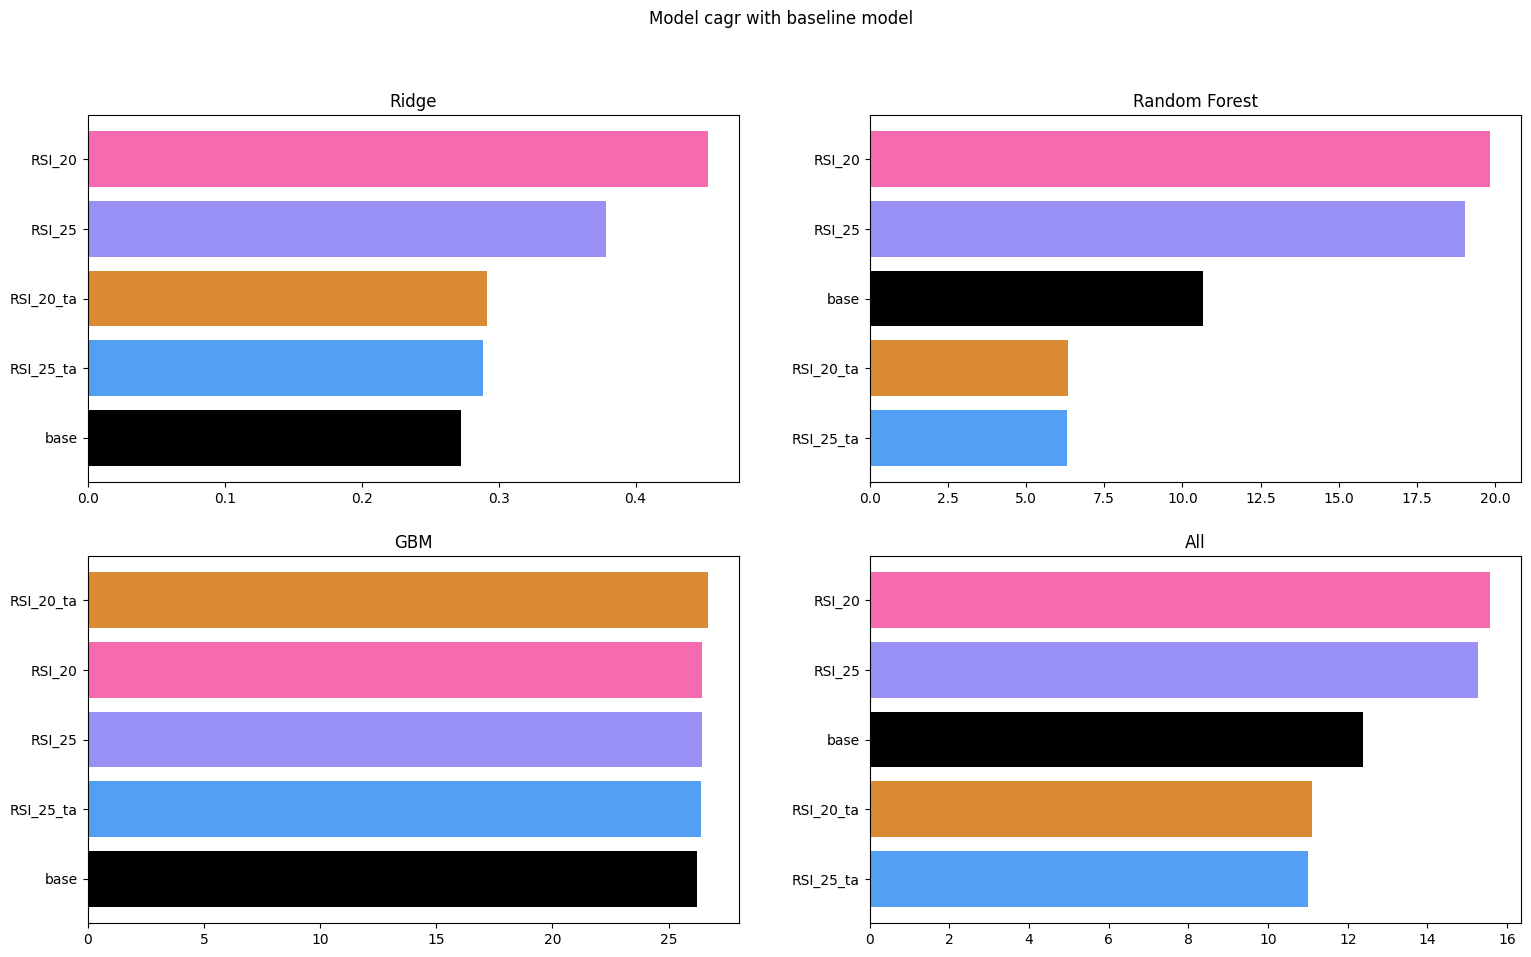

In [21]:
plot_model_vs_baseline(df_rsi, key = 'cagr', ascending=True)
# plt.savefig('../imgs/model_rsi_cagr.png')

In [14]:
df_3model = df_model.groupby(['model_name'])[['test_rmse','test_sharpe','test_spearmanr','cagr']].mean().sort_values(['test_sharpe'])
df_3model

,test_rmse,test_sharpe,test_spearmanr,cagr
model_name,,,,
gb,0.000552,0.185559,0.149235,26.531731
ridge,0.000438,0.268788,0.171447,1.386220
rf,0.000466,0.332970,0.180510,12.008547


### Comparing tickers

In [15]:
df_ticker = df_model.groupby(['ticker_name'])[['test_rmse','test_sharpe','test_spearmanr','cagr']].mean().sort_values(['test_sharpe'])
df_ticker[df_ticker['test_sharpe'] > 0]

,test_rmse,test_sharpe,test_spearmanr,cagr
ticker_name,,,,
RUT,0.000255,0.043184,0.244727,4.406812
BAC,0.000659,0.092401,0.146929,19.679290
DIS,0.000623,0.107883,0.127887,4.895465
DJI,0.000146,0.127097,0.180644,2.054986
TLT,0.000102,0.207405,0.115181,2.200746
IBM,0.000290,0.210628,0.135763,4.233142
WMT,0.000205,0.241061,0.188719,3.335411
CAT,0.000438,0.262389,0.141602,12.791796
NKE,0.000447,0.301910,0.184020,6.843044


In [16]:
df_ticker = df_model.groupby(['ticker_name'])[['test_rmse','test_sharpe','test_spearmanr','cagr']].mean().sort_values(['test_sharpe'])
list_tickers = ['BA','RUT','TSLA']
df_ticker_selected = df_ticker[df_ticker.index.isin(list_tickers)]

In [17]:
df_ticker_selected.sort_values(['test_sharpe'])

,test_rmse,test_sharpe,test_spearmanr,cagr
ticker_name,,,,
BA,0.001428,-0.095672,0.124814,7.965746
RUT,0.000255,0.043184,0.244727,4.406812
TSLA,0.002197,0.872364,0.147286,128.380852


In [18]:
df_ticker_ind = df_model.groupby(['ticker_name','col'])[['test_rmse','test_sharpe','test_spearmanr','cagr']].mean().sort_values(['test_sharpe']).reset_index()
list_tickers = ['BA','BAC','RUT','TLT','TSLA']
df_ticker_ind = df_ticker_ind[df_ticker_ind['ticker_name'].isin(list_tickers)]

In [19]:
## this is the list of conditions we created shap result for
evaluation_list = [
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'TLT'},
    {'col': 'RSI_20_ta', 'model_name': 'rf', 'ticker_name': 'TLT'},
    {'col': 'FTI_BF', 'model_name': 'ridge', 'ticker_name': 'TLT'},
    {'col': 'RSI_20_ta', 'model_name': 'gb', 'ticker_name': 'TLT'},
    {'col': 'PR_INT_20', 'model_name': 'rf', 'ticker_name': 'TLT'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'TLT'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'TLT'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'TLT'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'TLT'},
    {'col': 'DT_RSI_2_20', 'model_name': 'gb', 'ticker_name': 'BA'},
    {'col': 'ENT_4_16', 'model_name': 'rf', 'ticker_name': 'BA'},
    {'col': 'RSI_25', 'model_name': 'ridge', 'ticker_name': 'BA'},
    {'col': 'MADIFF_10_100', 'model_name': 'gb', 'ticker_name': 'BA'},
    {'col': 'CMMA_10_252', 'model_name': 'rf', 'ticker_name': 'BA'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'BA'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'BA'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'BA'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'BA'},
    {'col': 'PR_INT_20', 'model_name': 'gb', 'ticker_name': 'RUT'},
    {'col': 'ENT_2_10', 'model_name': 'rf', 'ticker_name': 'RUT'},
    {'col': 'MADIFF_10_100_0', 'model_name': 'ridge', 'ticker_name': 'RUT'},
    {'col': 'STO_20_1', 'model_name': 'gb', 'ticker_name': 'RUT'},
    {'col': 'PR_INT_20', 'model_name': 'rf', 'ticker_name': 'RUT'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'RUT'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'RUT'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'RUT'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'RUT'},
    {'col': 'DT_RSI_2_20', 'model_name': 'gb', 'ticker_name': 'TSLA'},
    {'col': 'LINTRND_10', 'model_name': 'rf', 'ticker_name': 'TSLA'},
    {'col': 'RSI_20', 'model_name': 'ridge', 'ticker_name': 'TSLA'},
    {'col': 'ENT_4_16', 'model_name': 'gb', 'ticker_name': 'TSLA'},
    {'col': 'PR_INT_0', 'model_name': 'rf', 'ticker_name': 'TSLA'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'TSLA'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'TSLA'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'TSLA'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'TSLA'},
    {'col': 'DT_RSI_2_20', 'model_name': 'gb', 'ticker_name': 'BAC'},
    {'col': 'LINTRND_10', 'model_name': 'rf', 'ticker_name': 'BAC'},
    {'col': 'RSI_20', 'model_name': 'ridge', 'ticker_name': 'BAC'},
    {'col': 'ENT_4_16', 'model_name': 'gb', 'ticker_name': 'BAC'},
    {'col': 'PR_INT_0', 'model_name': 'rf', 'ticker_name': 'BAC'},
    {'col': 'PR_INT_0', 'model_name': 'ridge', 'ticker_name': 'BAC'},
    {'col': 'base', 'model_name': 'ridge', 'ticker_name': 'BAC'},
    {'col': 'base', 'model_name': 'rf', 'ticker_name': 'BAC'},
    {'col': 'base', 'model_name': 'gb', 'ticker_name': 'BAC'}
    ]

In [20]:
xx = [ df_model[(df_model[list(i)] == pd.Series(i)).all(axis=1)]  for i in evaluation_list]

df_shap = pd.concat(xx)[['col','model_name','ticker_name','test_rmse','test_spearmanr','cagr']].sort_values(['cagr'])


In [21]:
import antropy as ant

In [22]:
## calculate entropy
def calc_entropy(one_ticker, one_model, indicator_list):

    ticker_data =  pd.read_csv(f'../data/{one_ticker}_full.csv')
    for ind in indicator_list:
        print(f'{ind} has antropy: ', ant.perm_entropy(ticker_data[ind], normalize=True))
    res = df_shap[ (df_shap['model_name'] == one_model) & (df_shap['ticker_name'] == one_ticker)].sort_values('cagr')
    return(res)


In [23]:
one_ticker = 'BA'
one_model = 'ridge'
one_col = ['PR_INT_0','RSI_25']
calc_entropy(one_ticker, one_model, one_col)

PR_INT_0 has antropy:  0.9907371040471289
RSI_25 has antropy:  0.9394603263283937


,col,model_name,ticker_name,test_rmse,test_spearmanr,cagr
0,base,ridge,BA,0.001307,0.035699,0.269099
3,RSI_25,ridge,BA,0.001305,0.059080,0.488410
11,PR_INT_0,ridge,BA,0.001008,0.725209,5.957554


In [24]:
one_ticker = 'RUT'
one_model = 'rf'
one_col = ['PR_INT_20','ENT_2_10']
calc_entropy(one_ticker, one_model, one_col)

PR_INT_20 has antropy:  0.9522595370146877
ENT_2_10 has antropy:  0.728792127248991


,col,model_name,ticker_name,test_rmse,test_spearmanr,cagr
33,ENT_2_10,rf,RUT,0.000269,0.064639,1.582036
31,PR_INT_20,rf,RUT,0.000213,0.617668,5.397331
19,base,rf,RUT,0.000275,0.041704,5.679199


In [25]:
one_ticker = 'TSLA'
one_model = 'gb'
one_col = ['DT_RSI_2_20','ENT_4_16']
calc_entropy(one_ticker, one_model, one_col)

DT_RSI_2_20 has antropy:  0.9430318175631063
ENT_4_16 has antropy:  0.8396141107230007


,col,model_name,ticker_name,test_rmse,test_spearmanr,cagr
38,base,gb,TSLA,0.002553,0.006280,273.569562
43,DT_RSI_2_20,gb,TSLA,0.001918,0.410674,278.419484
53,ENT_4_16,gb,TSLA,0.002960,-0.009943,283.650209


#